<a href="https://colab.research.google.com/github/SidharthBhakth/Feedforward-NNs-in-pyTorch/blob/main/03_Dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dropout**

In [ ]:
# Import libraries

import numpy as np

import torch
import torchvision
from torch import nn, optim
import torch.nn.functional as F

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('poster')

In [ ]:
# Check if GPU is available
print(torch.cuda.is_available())

# Set device to GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

True


device(type='cuda')

In [ ]:
# Load MNIST data

# Train data
mnist_train=torchvision.datasets.MNIST('mnist',
                                       train=True,
                                       download=True,
                                       transform=torchvision.transforms.Compose(
                                                                                [torchvision.transforms.ToTensor(),
                                                                                torchvision.transforms.Normalize((0.1307,), (0.3081,))]
                                                                                )
                                       )


# Test data
mnist_test=torchvision.datasets.MNIST('mnist',
                                       train=False,
                                       download=True,
                                       transform=torchvision.transforms.Compose(
                                                                                [torchvision.transforms.ToTensor(),
                                                                                torchvision.transforms.Normalize((0.1307,), (0.3081,))]
                                                                                )
                                       )

In [ ]:
print("No: of images in train data set - ", len(mnist_train))
X_train = mnist_train.data
Y_train = mnist_train.targets

print("No: of images in test data set - ", len(mnist_test))
X_test = mnist_test.data
Y_test = mnist_test.targets

No: of images in train data set -  60000
No: of images in test data set -  10000


In [ ]:
# reshape images to 1D array to input to the neural network
X_train = torch.reshape(X_train, (-1, 784)).float().to(device)
Y_train = torch.LongTensor(Y_train).to(device)

X_test = torch.reshape(X_test, (-1, 784)).float().to(device)
Y_test = torch.LongTensor(Y_test).to(device)

### Model A

Activation function: the logistic sigmoid function; initialization: Xavier initializer; no dropout

In [ ]:
class NeuralNetworkA(nn.Module):
  def __init__(self, input=784, output=10, hidden=1024):
    super(NeuralNetworkA, self).__init__()

    self.hidden_layer1 = nn.Linear(input, hidden)
    nn.init.xavier_normal_(self.hidden_layer1.weight)

    self.hidden_layer2 = nn.Linear(hidden, hidden)
    nn.init.xavier_normal_(self.hidden_layer2.weight)

    self.hidden_layer3 = nn.Linear(hidden, hidden)
    nn.init.xavier_normal_(self.hidden_layer3.weight)

    self.hidden_layer4 = nn.Linear(hidden, hidden)
    nn.init.xavier_normal_(self.hidden_layer4.weight)

    self.hidden_layer5 = nn.Linear(hidden, hidden)
    nn.init.xavier_normal_(self.hidden_layer5.weight)

    self.output_layer = nn.Linear(hidden, output)
    nn.init.xavier_normal_(self.output_layer.weight)
    
    self.activation = nn.Sigmoid()

  def forward(self, X):
    self.X = X
    self.hidden1 = self.activation(self.hidden_layer1(self.X))
    self.hidden2 = self.activation(self.hidden_layer2(self.hidden1))
    self.hidden3 = self.activation(self.hidden_layer3(self.hidden2))
    self.hidden4 = self.activation(self.hidden_layer4(self.hidden3))
    self.hidden5 = self.activation(self.hidden_layer5(self.hidden4))
    self.output = self.output_layer(self.hidden5)

    return F.log_softmax(self.output, dim = 1)

### Model B

Activation function: the logistic sigmoid function; initialization: Xavier initializer; with dropout rate: 0.2 for the first layer and 0.5 for the other hidden layers

In [ ]:
class NeuralNetworkB(nn.Module):
  def __init__(self, input=784, output=10, hidden=1024):
    super(NeuralNetworkB, self).__init__()

    self.hidden_layer1 = nn.Linear(input, hidden)
    nn.init.xavier_normal_(self.hidden_layer1.weight)

    self.hidden_layer2 = nn.Linear(hidden, hidden)
    nn.init.xavier_normal_(self.hidden_layer2.weight)

    self.hidden_layer3 = nn.Linear(hidden, hidden)
    nn.init.xavier_normal_(self.hidden_layer3.weight)

    self.hidden_layer4 = nn.Linear(hidden, hidden)
    nn.init.xavier_normal_(self.hidden_layer4.weight)

    self.hidden_layer5 = nn.Linear(hidden, hidden)
    nn.init.xavier_normal_(self.hidden_layer5.weight)

    self.output_layer = nn.Linear(hidden, output)
    nn.init.xavier_normal_(self.output_layer.weight)
    
    self.activation = nn.Sigmoid()

    self.dropout1 = nn.Dropout(0.2)
    self.dropout2 = nn.Dropout(0.5)

  def forward(self, X):
    self.X = self.dropout1(X)
    self.hidden1 = self.dropout2(self.activation(self.hidden_layer1(self.X)))
    self.hidden2 = self.dropout2(self.activation(self.hidden_layer2(self.hidden1)))
    self.hidden3 = self.dropout2(self.activation(self.hidden_layer3(self.hidden2)))
    self.hidden4 = self.dropout2(self.activation(self.hidden_layer4(self.hidden3)))
    self.hidden5 = self.dropout2(self.activation(self.hidden_layer5(self.hidden4)))
    self.output = self.output_layer(self.hidden5)

    return F.log_softmax(self.output, dim = 1)

### Model C

Activation function: ReLU; initialization: Kaiming He’s initializer; no dropout

In [ ]:
class NeuralNetworkC(nn.Module):
  def __init__(self, input=784, output=10, hidden=1024):
    super(NeuralNetworkC, self).__init__()

    self.hidden_layer1 = nn.Linear(input, hidden)
    nn.init.kaiming_normal_(self.hidden_layer1.weight)

    self.hidden_layer2 = nn.Linear(hidden, hidden)
    nn.init.kaiming_normal_(self.hidden_layer2.weight)

    self.hidden_layer3 = nn.Linear(hidden, hidden)
    nn.init.kaiming_normal_(self.hidden_layer3.weight)

    self.hidden_layer4 = nn.Linear(hidden, hidden)
    nn.init.kaiming_normal_(self.hidden_layer4.weight)

    self.hidden_layer5 = nn.Linear(hidden, hidden)
    nn.init.kaiming_normal_(self.hidden_layer5.weight)

    self.output_layer = nn.Linear(hidden, output)
    nn.init.kaiming_normal_(self.output_layer.weight)
    
    self.activation = nn.ReLU()

  def forward(self, X):
    self.X = X
    self.hidden1 = self.activation(self.hidden_layer1(self.X))
    self.hidden2 = self.activation(self.hidden_layer2(self.hidden1))
    self.hidden3 = self.activation(self.hidden_layer3(self.hidden2))
    self.hidden4 = self.activation(self.hidden_layer4(self.hidden3))
    self.hidden5 = self.activation(self.hidden_layer5(self.hidden4))
    self.output = self.output_layer(self.hidden5)

    return F.log_softmax(self.output, dim = 1)

### Model D

Activation function: ReLU; initialization: Kaiming He’s initializer; with dropout rate: 0.2 for the first layer and 0.5 for the other hidden layers

In [ ]:
class NeuralNetworkD(nn.Module):
  def __init__(self, input=784, output=10, hidden=1024):
    super(NeuralNetworkD, self).__init__()

    self.hidden_layer1 = nn.Linear(input, hidden)
    nn.init.kaiming_normal_(self.hidden_layer1.weight)

    self.hidden_layer2 = nn.Linear(hidden, hidden)
    nn.init.kaiming_normal_(self.hidden_layer2.weight)

    self.hidden_layer3 = nn.Linear(hidden, hidden)
    nn.init.kaiming_normal_(self.hidden_layer3.weight)

    self.hidden_layer4 = nn.Linear(hidden, hidden)
    nn.init.kaiming_normal_(self.hidden_layer4.weight)

    self.hidden_layer5 = nn.Linear(hidden, hidden)
    nn.init.kaiming_normal_(self.hidden_layer5.weight)

    self.output_layer = nn.Linear(hidden, output)
    nn.init.kaiming_normal_(self.output_layer.weight)
    
    self.activation = nn.ReLU()

    self.dropout1 = nn.Dropout(0.2)
    self.dropout2 = nn.Dropout(0.5)

  def forward(self, X):
    self.X = self.dropout1(X)
    self.hidden1 = self.dropout2(self.activation(self.hidden_layer1(self.X)))
    self.hidden2 = self.dropout2(self.activation(self.hidden_layer2(self.hidden1)))
    self.hidden3 = self.dropout2(self.activation(self.hidden_layer3(self.hidden2)))
    self.hidden4 = self.dropout2(self.activation(self.hidden_layer4(self.hidden3)))
    self.hidden5 = self.dropout2(self.activation(self.hidden_layer5(self.hidden4)))
    self.output = self.output_layer(self.hidden5)

    return F.log_softmax(self.output, dim = 1)

In [ ]:
## Custom training loop to train Neural network
def training_loop(model, model_name, lr, epochs, batch_size=250):
  # Initilize NN class
  NN = model
  NN.to(device)

  # hyperparameters
  loss_fn = nn.CrossEntropyLoss()
  optimizer = optim.Adam(NN.parameters(), lr)

  # Keep track of train and test loss
  train_loss = []
  test_loss = []

  for i in range(epochs):
    running_loss = 0  
    for j in range(0, len(X_train), batch_size):
      X_mini = X_train[j:j+batch_size]
      Y_mini = Y_train[j:j+batch_size]
      
      optimizer.zero_grad()

      output = NN(X_mini)
      
      # compute loss
      train_loss_ = loss_fn(output, Y_mini)
      running_loss += train_loss_.item()    

      # Backpropagation
      train_loss_.backward()
      optimizer.step()

    # Perform a feedforward step on the the test data and compute test loss
    NN.eval()
    with torch.no_grad():
      pred = NN(X_test)
      test_loss_ = loss_fn(pred, Y_test)

    # Keep track of train and test loss for each epoch
    train_loss.append(running_loss/240)
    test_loss.append(test_loss_.data)

    NN.train()
    
    if (i+1) % 25 == 0:
      print("Epoch {}: training loss - {:.6f}, test loss - {:.6f}".format(i+1, running_loss/240, test_loss_.data))

  model_loss[model_name] = (train_loss, test_loss)

  return model_loss

> ### Logistic

In [ ]:
# Create a dictionary to keep track of model accuracy
model_loss = {}

In [ ]:
# Train model A
model_loss = training_loop(model           =   NeuralNetworkA(), 
                           model_name      =   'No dropout',
                           lr              =   0.0001,
                           epochs          =   500)

Epoch 25: training loss - 0.024992, test loss - 0.139513
Epoch 50: training loss - 0.013946, test loss - 0.133020
Epoch 75: training loss - 0.012539, test loss - 0.153564
Epoch 100: training loss - 0.008833, test loss - 0.163005
Epoch 125: training loss - 0.007487, test loss - 0.149429
Epoch 150: training loss - 0.008193, test loss - 0.141181
Epoch 175: training loss - 0.007030, test loss - 0.144166
Epoch 200: training loss - 0.006212, test loss - 0.143447
Epoch 225: training loss - 0.004911, test loss - 0.146750
Epoch 250: training loss - 0.005167, test loss - 0.138933
Epoch 275: training loss - 0.002820, test loss - 0.147471
Epoch 300: training loss - 0.004980, test loss - 0.150904
Epoch 325: training loss - 0.002789, test loss - 0.143318
Epoch 350: training loss - 0.005122, test loss - 0.135633
Epoch 375: training loss - 0.000019, test loss - 0.153756
Epoch 400: training loss - 0.000001, test loss - 0.179352
Epoch 425: training loss - 0.000000, test loss - 0.206943
Epoch 450: traini

In [ ]:
# Train model B
model_loss = training_loop(model           =   NeuralNetworkB(), 
                           model_name      =   'Dropout',
                           lr              =   0.0001,
                           epochs          =   500)

Epoch 25: training loss - 0.240348, test loss - 0.146279
Epoch 50: training loss - 0.167270, test loss - 0.107202
Epoch 75: training loss - 0.133402, test loss - 0.088469
Epoch 100: training loss - 0.111932, test loss - 0.077934
Epoch 125: training loss - 0.096371, test loss - 0.067284
Epoch 150: training loss - 0.085055, test loss - 0.061675
Epoch 175: training loss - 0.077520, test loss - 0.059562
Epoch 200: training loss - 0.071639, test loss - 0.056814
Epoch 225: training loss - 0.063295, test loss - 0.056497
Epoch 250: training loss - 0.058035, test loss - 0.052137
Epoch 275: training loss - 0.055323, test loss - 0.053398
Epoch 300: training loss - 0.051781, test loss - 0.051652
Epoch 325: training loss - 0.049358, test loss - 0.050883
Epoch 350: training loss - 0.045744, test loss - 0.052531
Epoch 375: training loss - 0.042834, test loss - 0.050913
Epoch 400: training loss - 0.039552, test loss - 0.048726
Epoch 425: training loss - 0.036775, test loss - 0.049699
Epoch 450: traini

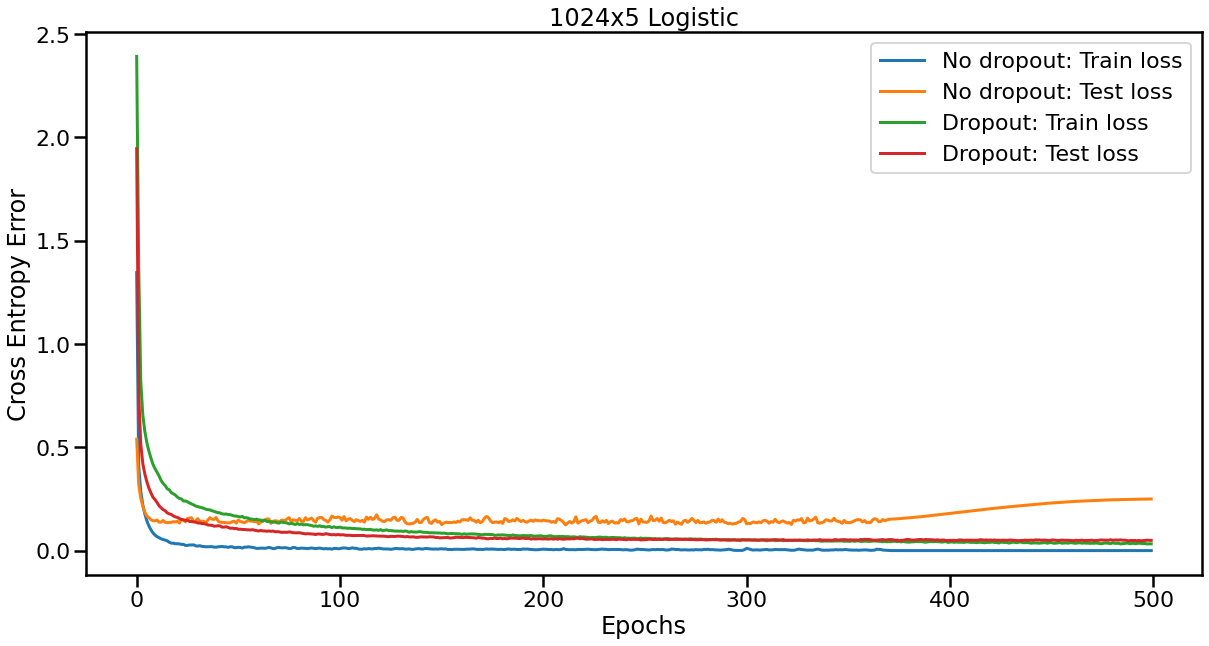

In [ ]:
plt.figure(figsize=(20,10))

for k, v in model_loss.items():
  plt.plot(v[0], label = k + ': Train loss')
  plt.plot(v[1], label = k + ': Test loss')

plt.title('1024x5 Logistic')
plt.ylabel('Cross Entropy Error')
plt.xlabel('Epochs')
plt.legend(loc='upper right')
plt.show()

> ### ReLU

In [ ]:
# Create a dictionary to keep track of model accuracy
model_loss = {}

In [ ]:
# Train model C
model_loss = training_loop(model           =   NeuralNetworkC(), 
                            model_name      =   'No dropout',
                           lr              =   0.0001,
                           epochs          =   500)

Epoch 25: training loss - 0.045476, test loss - 0.748954
Epoch 50: training loss - 0.026181, test loss - 0.492063
Epoch 75: training loss - 0.011151, test loss - 0.466663
Epoch 100: training loss - 0.012071, test loss - 0.354893
Epoch 125: training loss - 0.004065, test loss - 0.308630
Epoch 150: training loss - 0.003459, test loss - 0.273302
Epoch 175: training loss - 0.000001, test loss - 0.252161
Epoch 200: training loss - 0.000000, test loss - 0.255259
Epoch 225: training loss - 0.000000, test loss - 0.262721
Epoch 250: training loss - 0.000000, test loss - 0.273332
Epoch 275: training loss - 0.000000, test loss - 0.283216
Epoch 300: training loss - 0.000000, test loss - 0.289171
Epoch 325: training loss - 0.000000, test loss - 0.292488
Epoch 350: training loss - 0.000000, test loss - 0.294599
Epoch 375: training loss - 0.000000, test loss - 0.296131
Epoch 400: training loss - 0.000000, test loss - 0.297330
Epoch 425: training loss - 0.000000, test loss - 0.298308
Epoch 450: traini

In [ ]:
# Train model D
model_loss = training_loop(model           =   NeuralNetworkD(), 
                           model_name      =   'Dropout',
                           lr              =   0.0001,
                           epochs          =   500)

Epoch 25: training loss - 1.534556, test loss - 1.210902
Epoch 50: training loss - 0.451772, test loss - 0.226392
Epoch 75: training loss - 0.205661, test loss - 0.107985
Epoch 100: training loss - 0.128898, test loss - 0.079052
Epoch 125: training loss - 0.095778, test loss - 0.071662
Epoch 150: training loss - 0.079700, test loss - 0.068385
Epoch 175: training loss - 0.061761, test loss - 0.067292
Epoch 200: training loss - 0.059436, test loss - 0.063126
Epoch 225: training loss - 0.048651, test loss - 0.065137
Epoch 250: training loss - 0.041781, test loss - 0.062333
Epoch 275: training loss - 0.034030, test loss - 0.071252
Epoch 300: training loss - 0.037356, test loss - 0.067268
Epoch 325: training loss - 0.033637, test loss - 0.067963
Epoch 350: training loss - 0.030602, test loss - 0.069398
Epoch 375: training loss - 0.030354, test loss - 0.066288
Epoch 400: training loss - 0.025428, test loss - 0.073978
Epoch 425: training loss - 0.028407, test loss - 0.068751
Epoch 450: traini

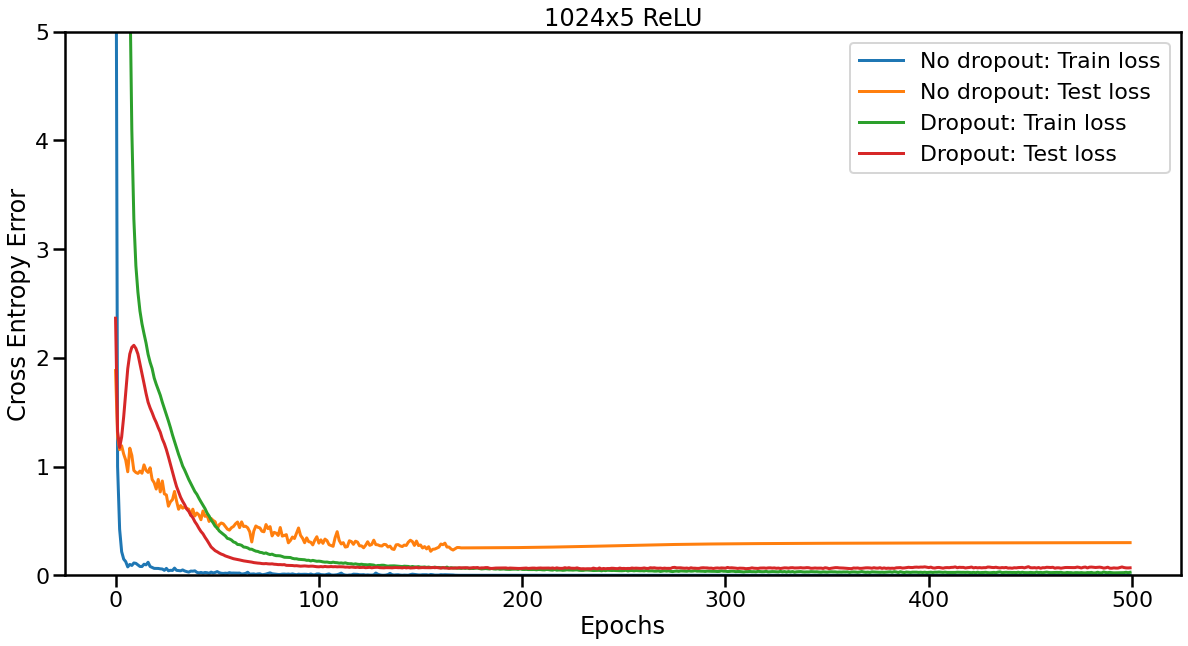

In [ ]:
plt.figure(figsize=(20,10))

for k, v in model_loss.items():
  plt.plot(v[0], label = k + ': Train loss')
  plt.plot(v[1], label = k + ': Test loss')

plt.title('1024x5 ReLU')
plt.ylabel('Cross Entropy Error')
plt.xlabel('Epochs')
plt.ylim(0, 5)
plt.legend(loc='upper right')
plt.show()